In [1]:
#Populate namespace using numpy and matplotlib
%pylab nbagg
rcParams['lines.linewidth'] = 2 #Lines are wider

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Producing the pdf version of this notebook including several figrues
from matplotlib.pyplot import *
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [5]:
#RHS of ODEs
def dz_dt(z, t, m1, m2, k, b):
    z1, z2, z3, z4, z5, z6, z7, z8 = z
    #Do not want r2_1 = 0 in the denominator
    r2_1 = sqrt((z5-z1)**2+(z7-z3)**2)
    eps = 1e-6
    if r2_1 < eps:
        r2_1 = eps
    fac = (k*b**2)/r2_1**3
    dzdt = [z2, -fac*(z5-z1)/m1, z4, -fac*(z7-z3)/m1,\
    z6, fac*(z5-z1)/m2, z8, fac*(z7-z3)/m2]
    return dzdt

In [6]:
#Part A
#Note: G is the gravitational constant in SI units, it is G = 6.674e-11
m1 = 1 #mass is in kg
m2 = 1 #mass is in kg
b = 1 #distance is in m

In [8]:
k=1 #gravitational force constant in Newtons (N)
#a = 1.496e11 , which is Earth's distance from the Sun in m
#s_y = 3.154e7 , which is Earth's orbital period in seconds
#v_1 = sqrt(G*m1/a)
#Print statement

#Initial conditions of m1:

x_init1=-10 #in m
y_init1=0.5 #in m
vx_init1=10 #in m/s
vy_init1=0  #in m/s

#Initial conditions of m2:
x_init2=0    #in m
y_init2=-0.5 #in m
vx_init2=0   #in m/s
vy_init2=0   #in m/s

z0=[x_init1,vx_init1,y_init1,vy_init1,x_init2,vx_init2,y_init2,vy_init2]

In [10]:
#Solve ODEs
from scipy.integrate import odeint

In [13]:
#Time bounds of integral
t_i=0
t_f=2
nt=10000 #Number of times

t=linspace(t_i,t_f,nt)

sol=odeint(dz_dt,z0,t,args=(m1,m2,k,b))

#Array of separation distance with above time bounds
r=sqrt((sol[:,4]-sol[:,0])**2 + (sol[:,6]-sol[:,2])**2)
print(r)

[10.04987562 10.04788535 10.04589508 ... 10.00617299 10.00816316
 10.01015334]


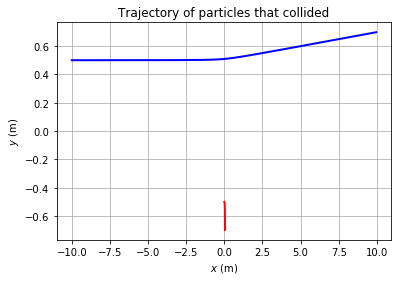

In [14]:
#Plot trajectories
figure(1)
plot(sol[:,0], sol[:,2], 'b')
plot(sol[:,4], sol[:,6], 'r')
xlabel('$x\ (\mathrm{m})$')
ylabel('$y\ (\mathrm{m})$')
grid()
title("Trajectory of particles that collided")
show()

In [17]:
#Part B
#Obtain values for theta1 and theta2
slope1=(sol[9900,2] - sol[9500,2])/(sol[9900,0] - sol[9500,0])
slope2 = (sol[9900,6] - sol[9500,6])/(sol[9900,4] - sol[9500,4])
theta1 = 180*arctan(slope1)/pi
theta2 = -180*arctan(slope2)/pi
print(theta1)
print(theta2)

1.1373350054827986
88.66720922322696


In [18]:
#Printing theta scattering
theta_scatter = theta1 + theta2
print(theta_scatter)

89.80454422870976


In [19]:
#Part C
#Obtaining and printing final moment for each particle
p1_f = m1 * sqrt(sol[9900,1]**2 + sol[9900,3]**2)
p2_f = m2 * sqrt(sol[9900,5]**2 + sol[9900,7]**2)
p_f = p1_f + p2_f
print(p_f)

10.196332953347726


In [20]:
#Initial momentum
p_i = m1 * -x_init1
print(p_i)

10


In [21]:
#Since p_f = 10.196 Ns is approximately equal to p_i = 10.0 Ns , then the sum of final momenta equals initial momentum of indicent particle.